<a href="https://colab.research.google.com/github/CuHzQuixote/Supervised-learning/blob/main/2-model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [ ]:
# import models and fit

In [1]:
import pandas as pd
import numpy as np

# Load scaled training and testing data
X_train = pd.read_csv("X_train_scaled.csv")  # Use the scaled version
X_test = pd.read_csv("X_test_scaled.csv")  # Use the scaled version

# Load both scaled and unscaled y values
y_train = pd.read_csv("y_train (1).csv").values.ravel()  # Unscaled for tree-based models
y_test = pd.read_csv("y_test (1).csv").values.ravel()

y_train_scaled = pd.read_csv("y_train_scaled.csv").values.ravel()  # Scaled for Linear Regression & SVR
y_test_scaled = pd.read_csv("y_test_scaled.csv").values.ravel()

print("Data successfully loaded!")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} (Unscaled)")
print(f"y_test shape: {y_test.shape} (Unscaled)")
print(f"y_train_scaled shape: {y_train_scaled.shape} (Scaled)")
print(f"y_test_scaled shape: {y_test_scaled.shape} (Scaled)")



Data successfully loaded!
X_train shape: (5268, 25)
X_test shape: (1317, 25)
y_train shape: (5268,) (Unscaled)
y_test shape: (1317,) (Unscaled)
y_train_scaled shape: (5268,) (Scaled)
y_test_scaled shape: (1317,) (Scaled)


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize and train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Uses unscaled y

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R² Score: {r2_rf}")



Random Forest - MSE: 117747778.13228758, R² Score: 0.9985617251121937


In [6]:
import xgboost as xgb

from xgboost import XGBRegressor

# Initialize and train model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)  # Uses unscaled y

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, R² Score: {r2_xgb}")



XGBoost - MSE: 394046031.27049816, R² Score: 0.9951867753225935


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import the imputer
import numpy as np

# Initialize the imputer with a strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your preferred strategy

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train_scaled)  # Uses scaled y and imputed data

# Predict
y_pred_lr = lr_model.predict(X_test_imputed) # Use imputed test data for predictions

# Evaluate
mse_lr = mean_squared_error(y_test_scaled, y_pred_lr)
r2_lr = r2_score(y_test_scaled, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R² Score: {r2_lr}")




Linear Regression - MSE: 0.0982756741798177, R² Score: 0.9004959866673681


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # Import the imputer
import numpy as np

# Initialize the imputer with a strategy (e.g., mean, median)
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your preferred strategy if needed

# Fit the imputer on your training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train model
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train_imputed, y_train_scaled)  # Uses scaled y and imputed data

# Predict
y_pred_svr = svr_model.predict(X_test_imputed) # Use imputed test data for predictions

# Evaluate
mse_svr = mean_squared_error(y_test_scaled, y_pred_svr)
r2_svr = r2_score(y_test_scaled, y_pred_svr)

print(f"SVR - MSE: {mse_svr}, R² Score: {r2_svr}")



SVR - MSE: 0.05167373565636287, R² Score: 0.9476803987903493


Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [ ]:
# gather evaluation metrics and compare results

In [10]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate RMSE (Root Mean Squared Error)
rmse_values = [
    np.sqrt(mse_rf),
    np.sqrt(mse_xgb),
    np.sqrt(mse_lr),
    np.sqrt(mse_svr)
]

# Calculate MAE (Mean Absolute Error)
mae_values = [
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_xgb),
    mean_absolute_error(y_test_scaled, y_pred_lr),
    mean_absolute_error(y_test_scaled, y_pred_svr)
]

# Store R² Scores
r2_values = [r2_rf, r2_xgb, r2_lr, r2_svr]

# Model names
models = ["Random Forest", "XGBoost", "Linear Regression", "SVR"]


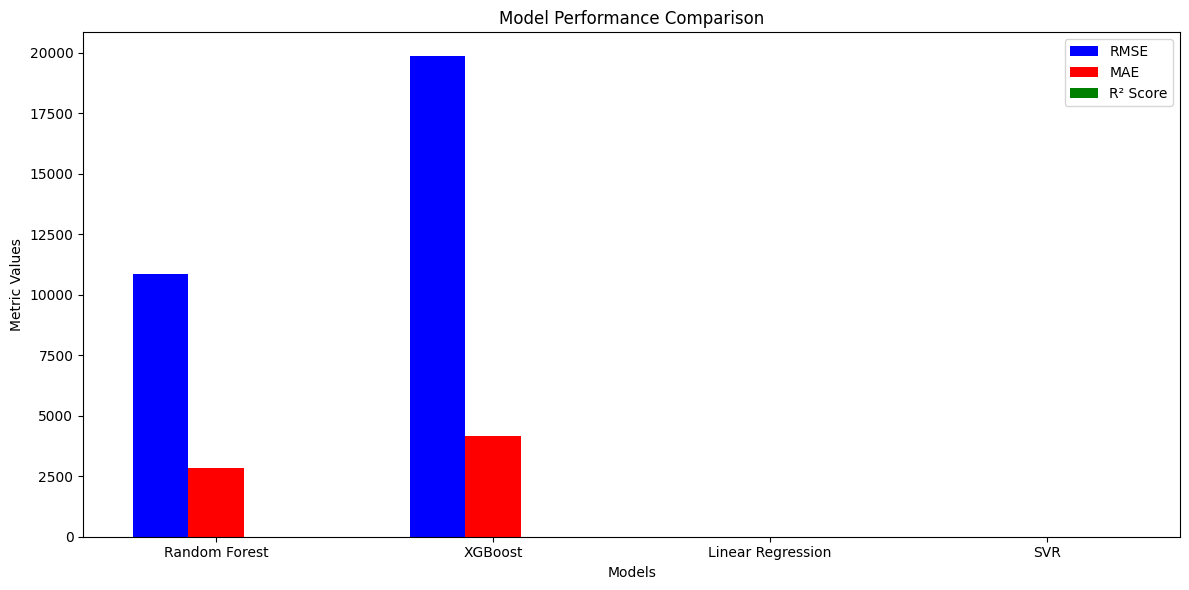

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Set bar width and positions
bar_width = 0.2
x = np.arange(len(models))

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each metric in different colors
ax.bar(x - bar_width, rmse_values, bar_width, label="RMSE", color="blue")
ax.bar(x, mae_values, bar_width, label="MAE", color="red")
ax.bar(x + bar_width, r2_values, bar_width, label="R² Score", color="green")

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Metric Values")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()



## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable.



In [ ]:
# perform feature selection
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)